## What I'm looking to do here:

Get ANI to provide all E_i from each of the models in the ensemble, use those E_i to get a *rho* for each atom specifically 


In [4]:
import torch
import torchani
from torchani.datasets import ANIDataset
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from torchani.units import hartree2kcalmol
from tqdm import tqdm

In [5]:
ds_path = Path('/home/nick/First_DSs/ANI-1x-first-conformers.h5')
device = torch.device('cpu')
ani2x = torchani.models.ANI2x().to(device)
ds = ANIDataset(locations=ds_path,names='1x-first')

/home/nick/TorchANI_sandbox/torchani/models.py:103: UserWarning: The default is now to accept atomic numbers as indexes, do not set periodic_table_index=True. if you need to accept raw indices set periodic_table_index=False
  warnings.warn("The default is now to accept atomic numbers as indexes,"


In [3]:
count = 0

df = pd.DataFrame(columns=['Energies','Stdev','QBC'])
count = 0
energies_list = []
stdev_list = []
qbc_list = []

for index, conformer in tqdm(enumerate(ds.iter_conformers())):
    species = conformer['species'][None]
    coordinates = conformer['coordinates'][None]
    assert len(species) == len(coordinates)
    ani_input = (species,coordinates) 
    _, energies = ani2x.members_energies(ani_input)
    stdev = energies.std(0)
    qbc_factor = (stdev / math.sqrt(len(species[0]))).tolist()
    qbc_factor = hartree2kcalmol(qbc_factor[0])
    stdev = hartree2kcalmol(stdev[0].tolist())
    print(stdev)
    energies = hartree2kcalmol(energies.mean(0)[0].tolist())

    energies_list.append(energies)
    stdev_list.append(stdev)
    qbc_list.append(qbc_factor)
    
    
    '''
    count += 1
    print('iter #',count)
    if count == 100:
        break
    '''

df['Energies'] = energies_list
df['Stdev'] = stdev_list
df['QBC'] = qbc_list
print(df)
df.to_csv('df_1x-first-totals.csv')

16it [00:00, 76.50it/s]

0.4161089740642007
0.31073059337839565
1.1807558003570449
0.5813912605391308
0.6290024616425082
1.0187918881428448
1.025352955085128
0.41617190811869975
0.5857005813457454
0.5874868054125861
0.761888137764609
0.7883823885105212
0.3459150033688249
0.4016952492909864
0.6017598325781799
1.8037697744178773


24it [00:00, 74.80it/s]

1.1618811359378511
0.5105773364444445
0.5783193992986062
0.42402843769065063
0.4441825298875532
0.7756200343339152
1.0639680928775752
0.47374655990004544
0.8317141834855397
1.3566655045689586
0.3310565397403696
0.6966596018752478
0.6936450497069861
1.6593289968001355
0.46249922528960963


40it [00:00, 73.21it/s]

0.7062196609699966
0.97710938179049
0.8452104152146672
0.6282940791393424
0.6031511755868726
0.8486743815480805
0.43884292418525983
2.0467167019890793
1.4269050230101037
1.019819871909427
0.39538551678225403
1.2124536710333988
0.6600526557928164
0.8742468657244409
0.648360874534009


56it [00:00, 70.57it/s]

0.7184285022842238
0.6066156167564486
1.850053589291104
0.9491504441116634
0.861783512226958
1.0094933541962174
3.267975588721825
0.9542149735722665
1.2178859428391537
2.4830191065999765
0.9411130019616895
0.8756539879040817
0.4625558768964164
0.9511354053755612
1.1416856234172097


72it [00:00, 70.43it/s]

0.4598865306185032
1.0173510891215045
1.0214624397740943
0.7156520987145308
1.1025613151548168
0.9817095945356017
1.0349140369039196
1.4374402494797889
0.2909658485720517
0.3862703061203223
1.0433837991171846
1.2051726794166084
1.0159597461128118
1.1602793309314663


87it [00:01, 66.59it/s]

1.6444866410753562
0.5654947685329574
0.7312934210719926
0.6567106127756641
0.8426030533189275
0.9314327727918961
1.0188947449608767
1.1044603675991083
1.5361036067289908
0.7977626673288658
1.4605077902681374
0.9584605202296325
0.8197865912831189


93it [00:01, 70.11it/s]


0.7658659498778786
0.9000823360832697
1.1610691660994799
0.9072133525243358
0.8164566748510471


KeyboardInterrupt: 

In [6]:
df = pd.read_csv('df_1x-first-totals.csv')
print(df)

      Unnamed: 0       Energies     Stdev       QBC
0              0 -242771.653475  0.416109  0.093045
1              1 -311527.009372  0.310731  0.066248
2              2 -358668.313897  1.180756  0.246205
3              3 -405837.769024  0.581391  0.118676
4              4 -380192.340793  0.629002  0.128395
...          ...            ...       ...       ...
3109        3109 -210092.040905  4.197025  1.876966
3110        3110 -137422.717225  0.528340  0.264170
3111        3111  -94265.996364  0.168469  0.119126
3112        3112 -141401.373943  0.155407  0.089725
3113        3113 -188533.524734  0.414469  0.207234

[3114 rows x 4 columns]


In [7]:
avg_e = df['Energies'].to_numpy().mean(0)
avg_std = df['Stdev'].to_numpy().mean(0)

print(avg_e, avg_std)

-358576.89370814594 0.9165148426396955


In [8]:
stdev_df = df['Stdev']

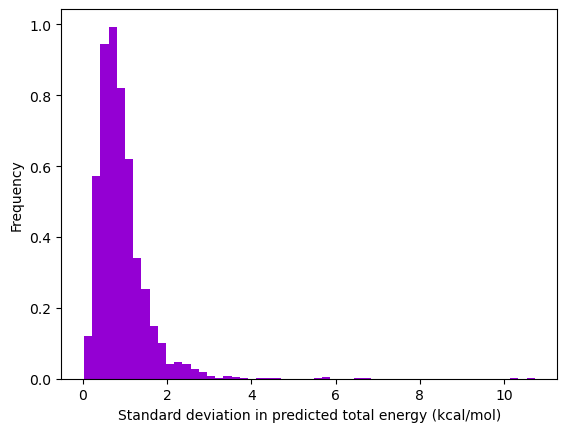

In [9]:
%matplotlib inline

plt.hist(stdev_df,density=True,bins=(math.isqrt(len(stdev_df))),color='darkviolet')

plt.rcParams['figure.dpi'] = 200

plt.xlabel('Standard deviation in predicted total energy (kcal/mol)')
plt.ylabel('Frequency')

plt.show()